# Save Basic Video Info into CSV

In [1]:
# from ffmpy import FFmpeg, FFprobe

import subprocess
from subprocess import Popen, PIPE

import json
import os
from collections import defaultdict

import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

In [30]:
import matplotlib.font_manager as font_manager

font_dirs = ['/home/tione/notebook/jing/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

mpl.rcParams['font.family'] = 'Noto Sans SC'

In [19]:
def video_info(video_path):
    ff = FFprobe(
        global_options='-of json -show_streams -select_streams v',
        inputs={video_path: None},
    )
    
    res = ff.run(stdout=PIPE, stderr=PIPE)
    video_stream = res[0]
    
    video_detail = json.loads(video_stream).get('streams')[0]

    # 需要记录的属性
    # width, height
    # duration
    # nb_frames
    # r_frame_rate
    return video_detail

In [20]:
temp_info = video_info('./dataset/videos/video_5k/train_5k/d3ce15c9842aa7f4d2089eff40c19591.mp4')

In [1]:
preprocessed_data_dir = './preprocessed_data'
train_data_dir = './dataset/videos/video_5k/train_5k'
test_data_dir = './dataset/videos/video_5k/test_5k'

In [ ]:
# train_video_info = defaultdict(list)

# for idx, item in enumerate(os.listdir(train_data_dir)):
#     item_path = os.path.join(train_data_dir, item)
    
#     temp_info = video_info(item_path)
#     for info_item in ['width', 'height', 'duration', 'nb_frames', 'r_frame_rate']:
#         train_video_info[info_item].append(temp_info[info_item])
    
#     train_video_info['name'].append(item)
    
#     if idx % 50 == 0:
#         print(idx)

In [31]:
train_df = pd.DataFrame.from_dict(train_video_info)

train_df.to_csv(os.path.join(preprocessed_data_dir, 'train_video_basic_info.csv'))

In [32]:
train_df.head()

,width,height,duration,nb_frames,r_frame_rate,name
0,1280,720,42.416992,1018,24/1,2e5bb3a6c1424def6b52df0509a57d85.mp4
1,1280,720,53.800000,1345,25/1,81d114dc7dedd03a279679bd035c8f5b.mp4
2,750,1536,27.520000,1376,50/1,da79b2d59c13b1610a9b7126d0ee3a2c.mp4
3,1280,720,28.366992,851,30/1,f993f160739146271be1dfc31502dba3.mp4
4,1280,720,52.440000,1311,25/1,488982dc3542e99dd3f7ae32fa15aa21.mp4


In [ ]:
# test_video_info = defaultdict(list)

# for idx, item in enumerate(os.listdir(test_data_dir)):
#     item_path = os.path.join(test_data_dir, item)
    
#     temp_info = video_info(item_path)
#     for info_item in ['width', 'height', 'duration', 'nb_frames', 'r_frame_rate']:
#         test_video_info[info_item].append(temp_info[info_item])
    
#     test_video_info['name'].append(item)
    
#     if idx % 50 == 0:
#         print(idx)

In [34]:
test_df = pd.DataFrame.from_dict(test_video_info)

test_df.to_csv(os.path.join(preprocessed_data_dir, 'test_video_basic_info.csv'))

In [35]:
test_df.head()

,width,height,duration,nb_frames,r_frame_rate,name
0,1280,720,48.000000,1440,30/1,7fe2c6b344d5cd8ec0f64b9ea952887b.mp4
1,1080,1920,58.120000,1453,25/1,6ff8e355235a495b3e4691017e9c8322.mp4
2,1280,720,32.440000,811,25/1,80c57248638368811fc95022f991789e.mp4
3,720,1280,37.880000,947,25/1,83d705d25b549ef73d33a9e2f1b0095e.mp4
4,720,1280,56.540000,2827,50/1,241c3762321c426e88271292b48d47eb.mp4


# Video Basic Info Analysis

## Train Dataset

In [67]:
train_df = pd.read_csv('./preprocessed_data/train_video_basic_info.csv')
train_df = train_df.astype({'nb_frames': 'int32', 'duration': 'float', 'width': 'int32', 'height': 'int32'})

In [82]:
train_df.head()

,Unnamed: 0,width,height,duration,nb_frames,r_frame_rate,name,ratio
0,0,1280,720,42.416992,1018,24/1,2e5bb3a6c1424def6b52df0509a57d85.mp4,1.777778
1,1,1280,720,53.800000,1345,25/1,81d114dc7dedd03a279679bd035c8f5b.mp4,1.777778
2,2,750,1536,27.520000,1376,50/1,da79b2d59c13b1610a9b7126d0ee3a2c.mp4,0.488281
3,3,1280,720,28.366992,851,30/1,f993f160739146271be1dfc31502dba3.mp4,1.777778
4,4,1280,720,52.440000,1311,25/1,488982dc3542e99dd3f7ae32fa15aa21.mp4,1.777778


<AxesSubplot:xlabel='nb_frames', ylabel='Count'>

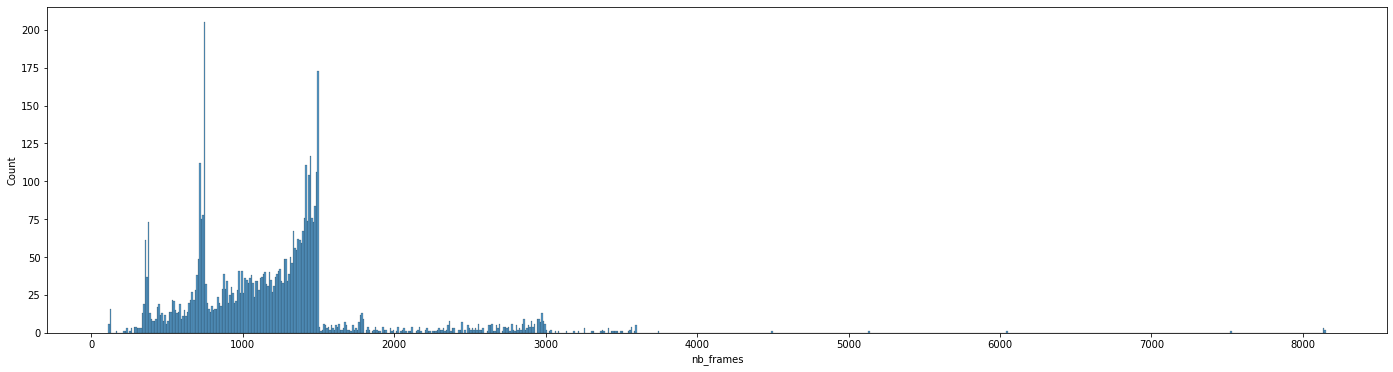

In [53]:
plt.figure(figsize=(24, 6))
sns.histplot(data=train_df, x='nb_frames', binwidth=10)

<AxesSubplot:xlabel='duration', ylabel='Count'>

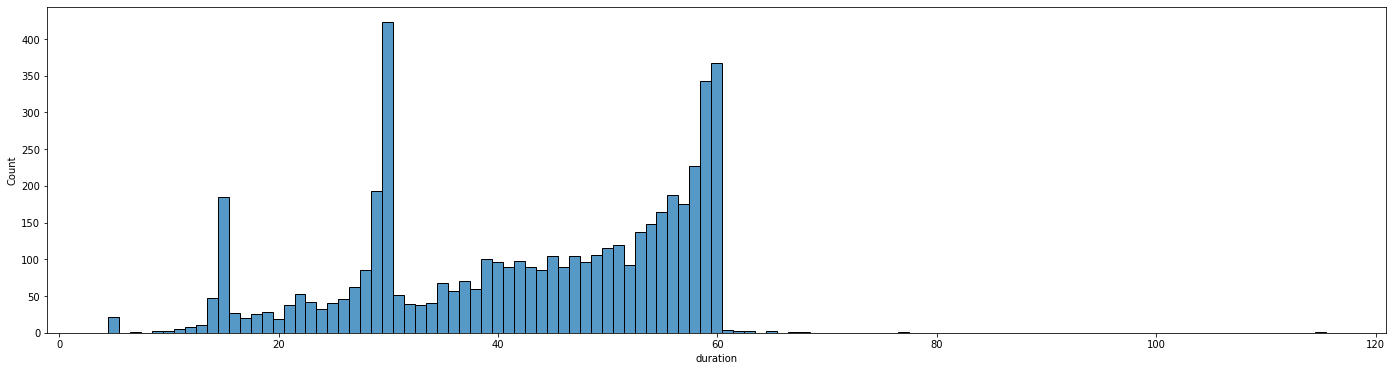

In [55]:
plt.figure(figsize=(24, 6))
sns.histplot(data=train_df, x='duration', binwidth=1)

In [69]:
train_df['ratio'] = train_df.apply(lambda row : float(row['width']) / row['height'], axis=1)

<AxesSubplot:xlabel='ratio', ylabel='count'>

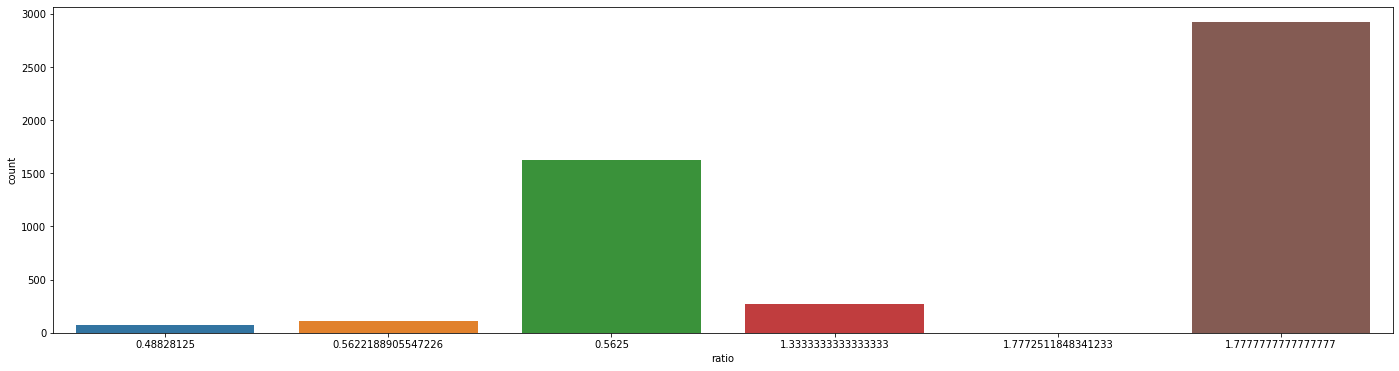

In [77]:
plt.figure(figsize=(24, 6))
sns.barplot(data=train_df.groupby('ratio')['name'].nunique().reset_index(name='count'), x='ratio', y='count')

## Test Dataset

In [89]:
test_df = pd.read_csv('./preprocessed_data/test_video_basic_info.csv')
test_df = test_df.astype({'nb_frames': 'int32', 'duration': 'float', 'width': 'int32', 'height': 'int32'})

In [90]:
test_df.head()

,Unnamed: 0,width,height,duration,nb_frames,r_frame_rate,name
0,0,1280,720,48.00,1440,30/1,7fe2c6b344d5cd8ec0f64b9ea952887b.mp4
1,1,1080,1920,58.12,1453,25/1,6ff8e355235a495b3e4691017e9c8322.mp4
2,2,1280,720,32.44,811,25/1,80c57248638368811fc95022f991789e.mp4
3,3,720,1280,37.88,947,25/1,83d705d25b549ef73d33a9e2f1b0095e.mp4
4,4,720,1280,56.54,2827,50/1,241c3762321c426e88271292b48d47eb.mp4


<AxesSubplot:xlabel='nb_frames', ylabel='Count'>

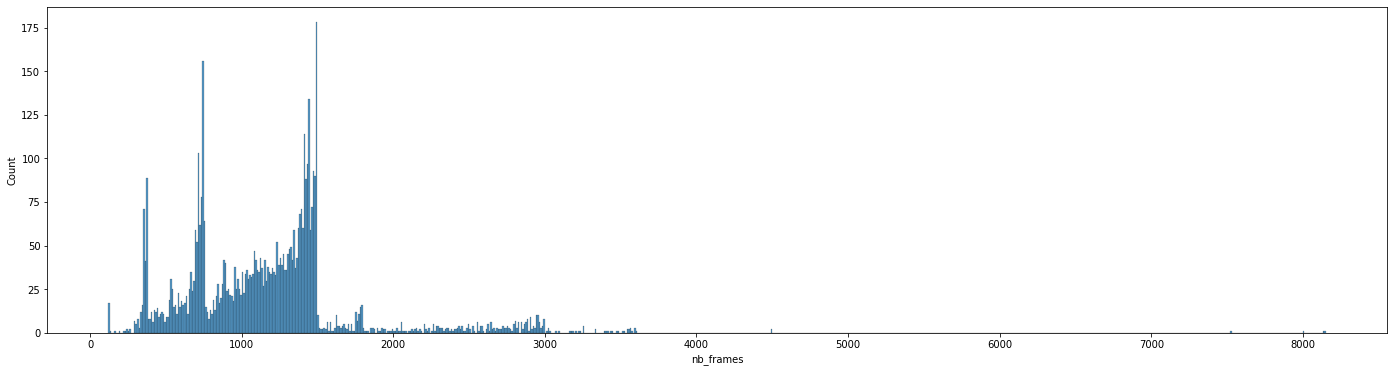

In [91]:
plt.figure(figsize=(24, 6))
sns.histplot(data=test_df, x='nb_frames', binwidth=10)

<AxesSubplot:xlabel='duration', ylabel='Count'>

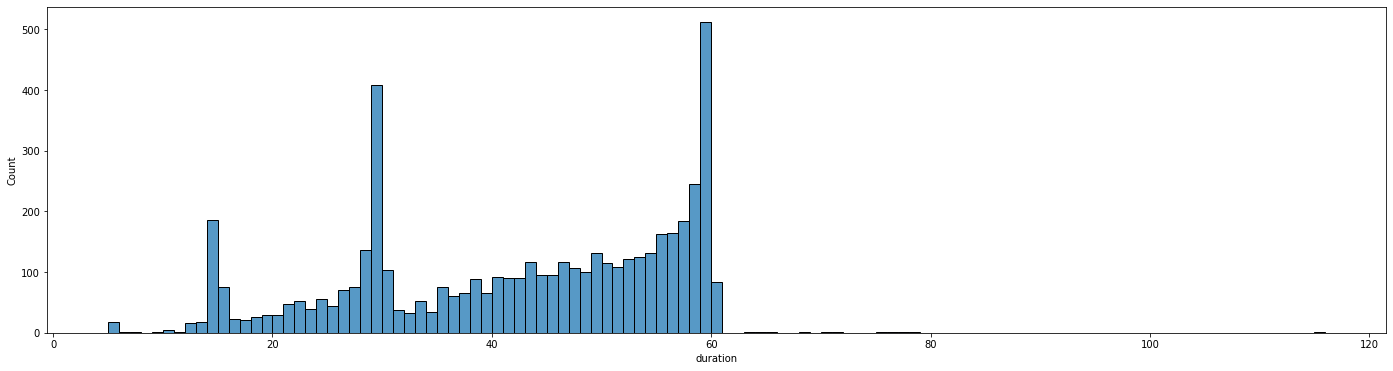

In [92]:
plt.figure(figsize=(24, 6))
sns.histplot(data=test_df, x='duration', binwidth=1)

<AxesSubplot:xlabel='ratio', ylabel='count'>

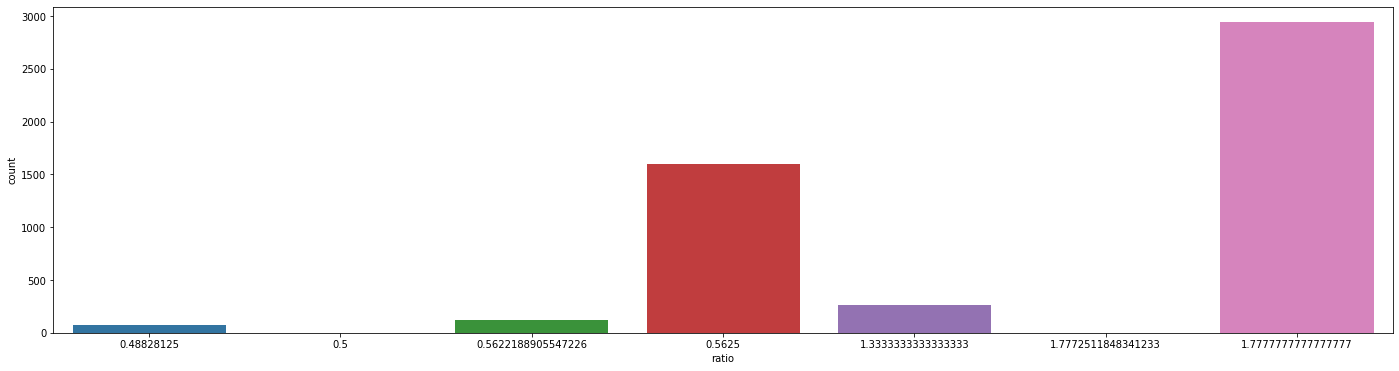

In [93]:
test_df['ratio'] = test_df.apply(lambda row : float(row['width']) / row['height'], axis=1)
plt.figure(figsize=(24, 6))
sns.barplot(data=test_df.groupby('ratio')['name'].nunique().reset_index(name='count'), x='ratio', y='count')

# Video Example

In [96]:
# ########## display

html_str = '''
<video controls src=\"{}\">animation</video>
'''.format('./dataset/videos/video_5k/train_5k/f345ffb29150dcd0d7649fa34f33a2a1.mp4')
print(html_str)
display(HTML(html_str))


<video controls src="./dataset/videos/video_5k/train_5k/f345ffb29150dcd0d7649fa34f33a2a1.mp4">animation</video>



# Extract I frame (H.264) of each Video

In [5]:
def extract_iframe(video_path, output_dir):
    home = os.path.expanduser("~")
    out_file = os.path.join(output_dir, '%03d.png')
    cmd = ['ffmpeg','-i', video_path,'-f', 'image2','-vf', 
               "select='eq(pict_type,PICT_TYPE_I)'",'-vsync','vfr',out_file]
    result = subprocess.call(cmd, stdout=subprocess.PIPE, text=True)
    print(result.stdout)

In [ ]:
# # train_5k

# output_dir = '/home/tione/notebook/Tagging/key_frames/train_5k'

# process_dict = dict()


# for i, item in enumerate(os.listdir('/home/tione/notebook/Tagging/dataset/videos/video_5k/train_5k')):
#     item_path = os.path.join(train_data_dir, item)
#     item_name = item.split('.')[0]
#     out_dir = os.path.join(output_dir, item_name)
    
#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)
    
#     out_file = os.path.join(out_dir, '%03d.png')
    
#     cmd = ['ffmpeg','-i', item_path, '-f', 'image2','-vf', 
#            "select='eq(pict_type,PICT_TYPE_I)'",'-vsync','vfr',out_file]
    
#     temp_process = subprocess.Popen(cmd, stdout=subprocess.PIPE, text=True)
#     process_dict[temp_process.pid] = temp_process
    
#     while len(process_dict) >= 4:
#         for item in process_dict:
#             if process_dict[item].poll() is not None:
#                 process_dict.pop(item)
#                 break

In [ ]:
# # test_5k

# output_dir = '/home/tione/notebook/Tagging/key_frames/test_5k'

# process_dict = dict()


# for i, item in enumerate(os.listdir('/home/tione/notebook/Tagging/dataset/videos/video_5k/train_5k')):
#     item_path = os.path.join(train_data_dir, item)
#     item_name = item.split('.')[0]
#     out_dir = os.path.join(output_dir, item_name)
    
#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)
    
#     out_file = os.path.join(out_dir, '%03d.png')
    
#     cmd = ['ffmpeg','-i', item_path, '-f', 'image2','-vf', 
#            "select='eq(pict_type,PICT_TYPE_I)'",'-vsync','vfr',out_file]
    
#     temp_process = subprocess.Popen(cmd, stdout=subprocess.PIPE, text=True)
#     process_dict[temp_process.pid] = temp_process
    
#     while len(process_dict) >= 4:
#         for item in process_dict:
#             if process_dict[item].poll() is not None:
#                 process_dict.pop(item)
#                 break

## Key Frames Statistics

In [3]:
train_df = pd.read_csv('./train_video_basic_info.csv')

In [4]:
train_df.head()

,Unnamed: 0,width,height,duration,nb_frames,r_frame_rate,name
0,0,1280,720,42.416992,1018,24/1,2e5bb3a6c1424def6b52df0509a57d85.mp4
1,1,1280,720,53.800000,1345,25/1,81d114dc7dedd03a279679bd035c8f5b.mp4
2,2,750,1536,27.520000,1376,50/1,da79b2d59c13b1610a9b7126d0ee3a2c.mp4
3,3,1280,720,28.366992,851,30/1,f993f160739146271be1dfc31502dba3.mp4
4,4,1280,720,52.440000,1311,25/1,488982dc3542e99dd3f7ae32fa15aa21.mp4


In [5]:
key_frame_dir = './key_frames/train_5k'

kf_cnt_list = []

for idx, row in train_df.iterrows():
    file_name = row['name']
    video_name = file_name.split('.')[0]
    
    temp_kf_dir = os.path.join(key_frame_dir, video_name)
    
    kf_cnt = len(os.listdir(temp_kf_dir))
    kf_cnt_list.append(kf_cnt)

In [6]:
train_df['key_frame_cnt'] = kf_cnt_list

<AxesSubplot:xlabel='key_frame_cnt', ylabel='Count'>

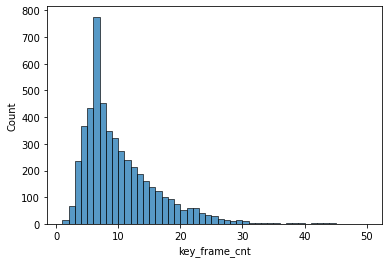

In [8]:
sns.histplot(data=train_df, x='key_frame_cnt', binwidth=1)

## Video Example with Key Frames

In [9]:
video_name = '81d114dc7dedd03a279679bd035c8f5b'

# ########## display
from IPython.display import display, HTML

html_str = '''
<video controls src=\"{}\">animation</video>
'''.format('./dataset/videos/video_5k/train_5k/%s.mp4' % video_name)
print(html_str)
display(HTML(html_str))


<video controls src="./dataset/videos/video_5k/train_5k/81d114dc7dedd03a279679bd035c8f5b.mp4">animation</video>



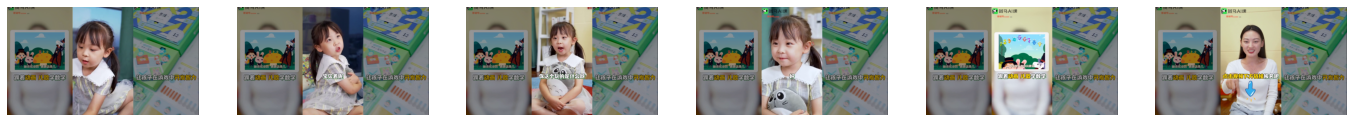

In [14]:
kf_dir = os.path.join(key_frame_dir, video_name)
kf_cnt = len(os.listdir(kf_dir))

plt.figure(figsize=(4 * kf_cnt, 4))

for i in range(kf_cnt):
    plt.subplot(1, kf_cnt, i + 1)
    plt.axis('off')
    plt.imshow(plt.imread(os.path.join(kf_dir, '%03d.png' % (i + 1))))

plt.show()

# Extract Frames from Raw Videos

5 frames for every second

In [ ]:
# ffmpeg -i ./dataset/videos/video_5k/train_5k/ffb38d359b2ac5a0f31b4b3dec52a010.mp4 -r 2 -q:v 2 -f image2 ./extracted_frames/%08d.000000.jpg

In [3]:
# train_5k

output_dir = '/home/tione/notebook/Tagging/extracted_frames/train_5k'

process_dict = dict()

n_frames_every_second = 2

train_data_dir = '/home/tione/notebook/Tagging/dataset/videos/video_5k/train_5k'


for i, item in enumerate(os.listdir('/home/tione/notebook/Tagging/dataset/videos/video_5k/train_5k')):
    item_path = os.path.join(train_data_dir, item)
    item_name = item.split('.')[0]
    out_dir = os.path.join(output_dir, item_name)
    
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    
    out_file = os.path.join(out_dir, '%04d.jpg')
    
    cmd = ['ffmpeg', '-i', item_path, '-r', str(n_frames_every_second), '-q:v', '2', '-f', 'image2', out_file]
    
    temp_process = subprocess.Popen(cmd, stdout=subprocess.PIPE, text=True)
    process_dict[temp_process.pid] = temp_process
    
    while len(process_dict) >= 8:
        for item in process_dict:
            if process_dict[item].poll() is not None:
                process_dict.pop(item)
                break

In [4]:
# test_5k

output_dir = '/home/tione/notebook/Tagging/extracted_frames/test_5k'

process_dict = dict()

n_frames_every_second = 2

train_data_dir = '/home/tione/notebook/Tagging/dataset/videos/video_5k/test_5k'


for i, item in enumerate(os.listdir('/home/tione/notebook/Tagging/dataset/videos/video_5k/test_5k')):
    item_path = os.path.join(train_data_dir, item)
    item_name = item.split('.')[0]
    out_dir = os.path.join(output_dir, item_name)
    
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    
    out_file = os.path.join(out_dir, '%04d.jpg')
    
    cmd = ['ffmpeg', '-i', item_path, '-r', str(n_frames_every_second), '-q:v', '2', '-f', 'image2', out_file]
    
    temp_process = subprocess.Popen(cmd, stdout=subprocess.PIPE, text=True)
    process_dict[temp_process.pid] = temp_process
    
    while len(process_dict) >= 8:
        for item in process_dict:
            if process_dict[item].poll() is not None:
                process_dict.pop(item)
                break

## Extract features with ResNet-101

In [18]:
# from ffmpy import FFmpeg, FFprobe

import subprocess
from subprocess import Popen, PIPE

import json
import os
from collections import defaultdict

import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
###
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np


resnet = torch.hub.load('/home/tione/notebook/Tagging/pretrained/vision-0.9.0', 'resnet101', pretrained=True, source='local')
device = torch.device('cuda:0')
cpu = torch.device('cpu')
image_embedding = nn.Sequential(*list(resnet.children())[:-2]).to(device)

image_preprocess = transforms.Compose([
    transforms.Resize(224),
#     transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
extracted_image_dir = './extracted_frames/train_5k'
extracted_feature_dir = './extracted_feature/train_5k/video_frames'

for idx, video_name in enumerate(os.listdir(extracted_image_dir)):
    if idx % 100 == 0:
        print(idx)
    
    image_dir = os.path.join(extracted_image_dir, video_name)
    temp_feature_list = list()
    for image in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image)
        temp_img = image_preprocess(Image.open(image_path)).to(device)
        temp_img_embedding = image_embedding(temp_img.unsqueeze(0))
        del temp_img
        temp_img_embedding = torch.mean(temp_img_embedding, dim=(2, 3))
        temp_feature_list.append(temp_img_embedding.detach().cpu().numpy())
        del temp_img_embedding
        torch.cuda.empty_cache()
    
    features = np.concatenate(temp_feature_list, axis=0)
    np.save(os.path.join(extracted_feature_dir, video_name), features)
    del temp_feature_list
    
    torch.cuda.empty_cache()

0
100
200
300
400
500
600
700


In [28]:
# verify extracted features and check the size of each feature

train_feature_size_dict = defaultdict(int)
error_list = []

for idx, item in enumerate(os.listdir('./extracted_feature/train_5k/video_frames')):
    item_path = os.path.join('./extracted_feature/train_5k/video_frames', item)
    data = np.load(item_path)
    if data.shape[1] == 2048:
        train_feature_size_dict[data.shape[0]] += 1
    else:
        print('Error: %s' % item)
        error_list.append(item)

<AxesSubplot:>

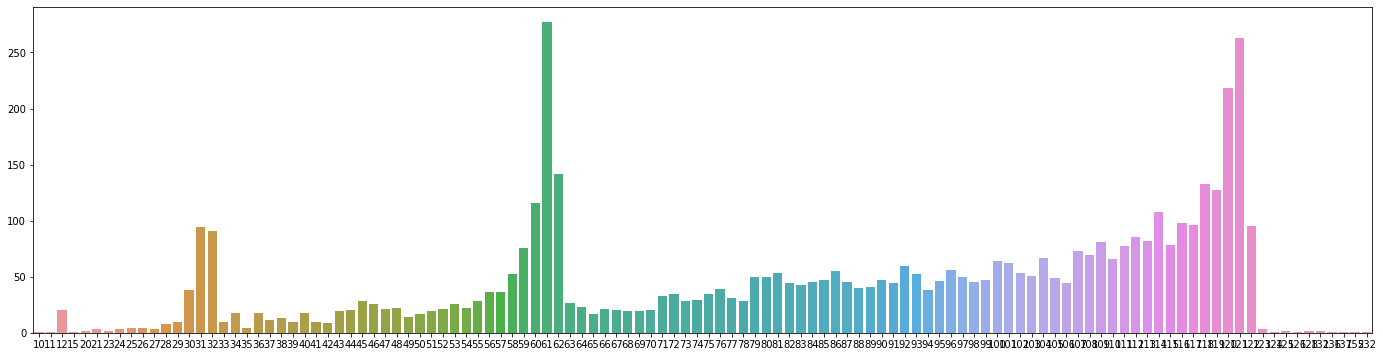

In [32]:
plt.figure(figsize=(24, 6))
sns.barplot(x=list(train_feature_size_dict.keys()), y=list(train_feature_size_dict.values()))

In [ ]:
extracted_image_dir = './extracted_frames/test_5k'
extracted_feature_dir = './extracted_feature/test_5k/video_frames'

for idx, video_name in enumerate(os.listdir(extracted_image_dir)):
    if idx % 100 == 0:
        print(idx)
    
    image_dir = os.path.join(extracted_image_dir, video_name)
    temp_feature_list = list()
    for image in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image)
        temp_img = image_preprocess(Image.open(image_path)).to(device)
        temp_img_embedding = image_embedding(temp_img.unsqueeze(0))
        del temp_img
        temp_img_embedding = torch.mean(temp_img_embedding, dim=(2, 3))
        temp_feature_list.append(temp_img_embedding.detach().cpu().numpy())
        del temp_img_embedding
        torch.cuda.empty_cache()
    
    features = np.concatenate(temp_feature_list, axis=0)
    np.save(os.path.join(extracted_feature_dir, video_name), features)
    del temp_feature_list
    
    torch.cuda.empty_cache()

0
100
200
300
400
500
600
700
800
900
1000


In [33]:
# verify extracted features and check the size of each feature

test_feature_size_dict = defaultdict(int)
error_list = []

for idx, item in enumerate(os.listdir('./extracted_feature/test_5k/video_frames')):
    item_path = os.path.join('./extracted_feature/test_5k/video_frames', item)
    data = np.load(item_path)
    if data.shape[1] == 2048:
        test_feature_size_dict[data.shape[0]] += 1
    else:
        print('Error: %s' % item)
        error_list.append(item)

<AxesSubplot:>

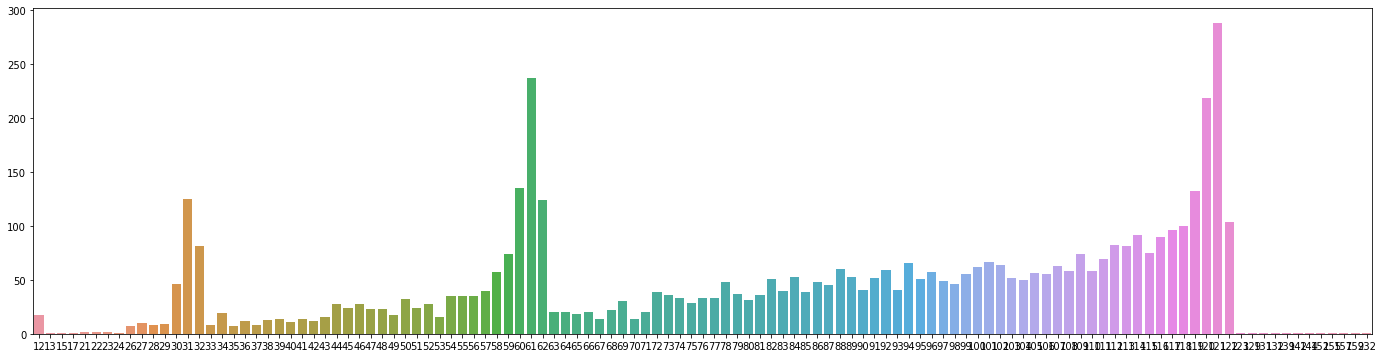

In [34]:
plt.figure(figsize=(24, 6))
sns.barplot(x=list(test_feature_size_dict.keys()), y=list(test_feature_size_dict.values()))

# Label Distribution

In [13]:
# read all labels
label_id_path = './dataset/label_id.txt'
label_dict = {
    'label_name_to_idx': dict(),
    'label_idx_to_name': list()
}

with open(label_id_path, 'r') as file:
    for row in file.readlines():
        label_name, label_id = row.split()
        
        label_dict['label_name_to_idx'][label_name] = int(label_id)
        label_dict['label_idx_to_name'].append(label_name)

In [18]:
label_cnt = defaultdict(int)

In [19]:
gt_label_path = './dataset/tagging/GroundTruth/tagging_info.txt'

In [20]:
with open(gt_label_path, 'r') as file:
    for row in file.readlines():
        _, labels = row.split()
        labels = labels.split(',')
        
        for item in labels:
            if item not in label_dict['label_idx_to_name']:
                print('Warning: cannot recognize [%s].' % item)
                
            else:
                label_cnt[item] += 1

<AxesSubplot:>

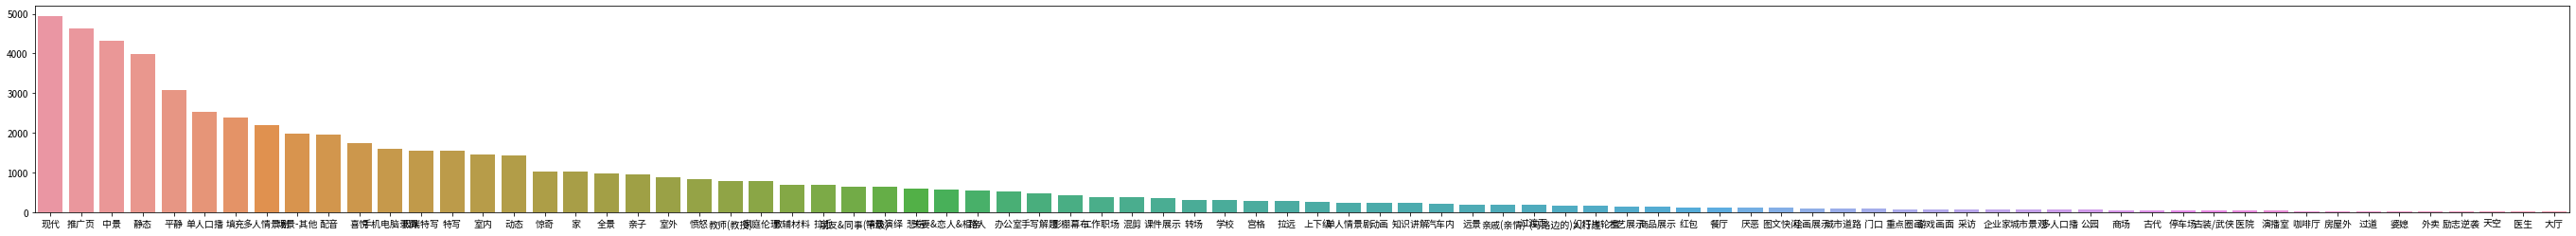

In [39]:
label_cnt_sorted = dict(sorted(label_cnt.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(48, 4))
sns.barplot(x=list(label_cnt_sorted.keys()), y=list(label_cnt_sorted.values()))

# Extract Image and Text Features

In [37]:
import os
import numpy as np
import json

device = torch.device('cuda:0')

# data_type = 'train'
data_type = 'test'

data_path = './dataset/tagging/tagging_dataset_%s_5k' % data_type

text_dir = os.path.join(data_path, 'text_txt/tagging')
image_dir = os.path.join(data_path, 'image_jpg/tagging')

In [38]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
txt_embedding = BertModel.from_pretrained('bert-base-chinese').to(device)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image


resnet = torch.hub.load('/home/tione/notebook/Tagging/pretrained/vision-0.9.0', 'resnet101', pretrained=True, source='local')
device = torch.device('cuda:0')
image_embedding = nn.Sequential(*list(resnet.children())[:-2]).to(device)

image_preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [40]:
# extract image feature
for idx, item in enumerate(os.listdir(image_dir)):
    if idx % 100 == 0:
        print(idx)
        
    item_name = item.split('.')[0]
    
    if os.path.exists(os.path.join('./extracted_feature/%s_5k/video_cover' % data_type, item_name + '.npy')):
        continue
    
    item_path = os.path.join(image_dir, item)
    
    temp_img = image_preprocess(Image.open(item_path))
    
    temp_img_embedding = image_embedding(temp_img.unsqueeze(0).to(device))
    
    temp_img_embedding = torch.mean(temp_img_embedding, dim=(2, 3))
    
    np.save(os.path.join('./extracted_feature/%s_5k/video_cover' % data_type, item_name), temp_img_embedding.squeeze(0).cpu().detach().numpy())

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [42]:
# check image features
error_list = list()

image_feature_path = './extracted_feature/%s_5k/video_cover' % data_type

for item in os.listdir(image_feature_path):
    temp_data = np.load(os.path.join(image_feature_path, item))
    
    try:
        assert len(temp_data.shape) == 1
        assert temp_data.shape[-1] == 2048
    except:
        error_list.append(item)
        print(item)
        print(temp_data)
        print('------')

In [46]:
# extract text feature

for idx, item in enumerate(os.listdir(text_dir)):
    if idx % 100 == 0:
        print(idx)
        
    item_name = item.split('.')[0]
    
    if os.path.exists(os.path.join('./extracted_feature/%s_5k/video_asr' % data_type, item_name + '.npy')):
        continue
        
    if os.path.exists(os.path.join('./extracted_feature/%s_5k/video_ocr' % data_type, item_name + '.npy')):
        continue
    
    item_path = os.path.join(text_dir, item)
    
    with open(item_path, 'r') as file:
        text_content = json.load(file)
    
    audio_text_token = tokenizer(text_content['video_asr'][:510], return_tensors='pt', padding=True)
    
    for item in audio_text_token:
        try:
            audio_text_token[item] = audio_text_token[item].to(device)
        except:
            pass
    
    audio_text_embedding = txt_embedding(**audio_text_token)['pooler_output']
    
    np.save(os.path.join('./extracted_feature/%s_5k/video_asr' % data_type, item_name), audio_text_embedding.squeeze(0).cpu().detach().numpy())
    
    image_text_token = tokenizer(text_content['video_ocr'][:510], return_tensors='pt', padding=True)
    
    for item in image_text_token:
        try:
            image_text_token[item] = image_text_token[item].to(device)
        except:
            pass
    
    image_text_embedding = txt_embedding(**image_text_token)['pooler_output']
    
    np.save(os.path.join('./extracted_feature/%s_5k/video_ocr' % data_type, item_name), image_text_embedding.squeeze(0).cpu().detach().numpy())

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [48]:
# check text features

error_list = list()

ocr_feature_path = './extracted_feature/%s_5k/video_ocr' % data_type
asr_feature_path = './extracted_feature/%s_5k/video_asr' % data_type

for item in os.listdir(ocr_feature_path):
    temp_data = np.load(os.path.join(ocr_feature_path, item))
    
    try:
        assert len(temp_data.shape) == 1
        assert temp_data.shape[-1] == 768
    except:
        error_list.append(item)
        print(item)
        print(temp_data)
        print('------')
        
for item in os.listdir(asr_feature_path):
    temp_data = np.load(os.path.join(asr_feature_path, item))
    
    try:
        assert len(temp_data.shape) == 1
        assert temp_data.shape[-1] == 768
    except:
        error_list.append(item)
        print(item)
        print(temp_data)
        print('------')

## Extract text feature as sequence

In [12]:
import os
import numpy as np
import json
import torch
from collections import defaultdict

device = torch.device('cuda:0')

# data_type = 'train'
data_type = 'test'

data_path = './dataset/tagging/tagging_dataset_%s_5k' % data_type

text_dir = os.path.join(data_path, 'text_txt/tagging')

In [13]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
txt_embedding = BertModel.from_pretrained('bert-base-chinese').to(device)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# extract text feature

for idx, item in enumerate(os.listdir(text_dir)):
    if idx % 100 == 0:
        print(idx)
        
    item_name = item.split('.')[0]
    
    if os.path.exists(os.path.join('./extracted_feature/%s_5k/video_text' % data_type, item_name + '.npy')):
        continue
    
    item_path = os.path.join(text_dir, item)
    
    with open(item_path, 'r') as file:
        text_content = json.load(file)
        
    text_list = list()
    text_list += text_content['video_asr'].split('|')
    text_list += text_content['video_ocr'].split('|')
    
    embedding_list = list()
    
    for text in text_list:
        text_token = tokenizer(text, return_tensors='pt', padding=True)
        
        for token_item in text_token:
            try:
                text_token[token_item] = text_token[token_item].to(device)
            except:
                pass
            
        text_embedding = txt_embedding(**text_token)['pooler_output']
        embedding_list.append(text_embedding.detach().cpu().numpy())
    
    data = np.concatenate(embedding_list, axis=0)
    np.save(os.path.join('./extracted_feature/%s_5k/video_text' % data_type, item.split('.')[0]), data)

0
100


In [5]:
train_data_path = './extracted_feature/train_5k/video_text'
test_data_path = './extracted_feature/test_5k/video_text'

In [8]:
error_list = []
train_text_length_dict = defaultdict(int)

for item in os.listdir(train_data_path):
    item_path = os.path.join(train_data_path, item)
    data = np.load(item_path)
    
    if data.shape[1] != 768:
        print('Error: %s' % item)
        error_list.append(item)
    else:
        train_text_length_dict[data.shape[0]] += 1

In [11]:
print(max(train_text_length_dict.keys()))

481


In [ ]:
error_list = []
train_text_length_dict = defaultdict(int)

for item in os.listdir(train_data_path):
    item_path = os.path.join(train_data_path, item)
    data = np.load(item_path)
    
    if data.shape[1] != 768:
        print('Error: %s' % item)
        error_list.append(item)
    else:
        text_length_dict[data.shape[0]] += 1